### Import Required Libraries

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

### Sample data

In [2]:
data = {
    "Transaction_ID": list(range(1001, 1021)),
    "Amount": [120.5, 5400.0, 230.0, 800.0, 75.0, 4500.0, 60.0, 1200.0, 3000.0, 90.0,
               6700.0, 85.0, 400.0, 980.0, 5000.0, 45.0, 220.0, 3100.0, 7300.0, 55.0],
    "Location": ["Delhi", "New York", "Mumbai", "London", "Pune", "Singapore", "Chennai", "Delhi", "Mumbai", "Kolkata",
                 "New York", "Chennai", "Hyderabad", "London", "Singapore", "Pune", "Mumbai", "London", "Singapore", "Delhi"],
    "Device_Type": ["Mobile", "Laptop", "Desktop", "Tablet", "Mobile", "Laptop", "Mobile", "Desktop", "Laptop", "Mobile",
                    "Laptop", "Mobile", "Tablet", "Laptop", "Desktop", "Mobile", "Tablet", "Laptop", "Desktop", "Mobile"],
    "Time_Hour": [14, 2, 11, 22, 9, 1, 19, 13, 3, 10, 0, 8, 18, 4, 23, 15, 21, 6, 5, 12],
    "Is_Foreign": [0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0],
    "Num_Past_Frauds": [0, 3, 0, 1, 0, 2, 0, 0, 1, 0, 4, 0, 0, 1, 3, 0, 0, 2, 3, 0],
    "Account_Age_Years": [5, 1, 4, 2, 6, 1, 8, 3, 2, 7, 1, 9, 4, 2, 1, 10, 5, 2, 1, 7],
    "Transaction_Type": ["Online", "Online", "POS", "Online", "ATM", "Online", "POS", "ATM", "Online", "POS",
                         "Online", "POS", "ATM", "Online", "Online", "POS", "ATM", "Online", "Online", "POS"],
    "Fraudulent": [0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
                   1, 0, 0, 1, 1, 0, 0, 1, 1, 0]
}

df = pd.DataFrame(data)
df

,Transaction_ID,Amount,Location,Device_Type,Time_Hour,Is_Foreign,Num_Past_Frauds,Account_Age_Years,Transaction_Type,Fraudulent
0,1001,120.5,Delhi,Mobile,14,0,0,5,Online,0
1,1002,5400.0,New York,Laptop,2,1,3,1,Online,1
2,1003,230.0,Mumbai,Desktop,11,0,0,4,POS,0
3,1004,800.0,London,Tablet,22,1,1,2,Online,1
4,1005,75.0,Pune,Mobile,9,0,0,6,ATM,0
5,1006,4500.0,Singapore,Laptop,1,1,2,1,Online,1
6,1007,60.0,Chennai,Mobile,19,0,0,8,POS,0
7,1008,1200.0,Delhi,Desktop,13,0,0,3,ATM,0
8,1009,3000.0,Mumbai,Laptop,3,0,1,2,Online,1
9,1010,90.0,Kolkata,Mobile,10,0,0,7,POS,0


### Encode Categorical Values

In [3]:
le = LabelEncoder()
for col in ["Location", "Device_Type", "Transaction_Type"]:
    df[col] = le.fit_transform(df[col])

### Define Features and Target

In [4]:
X = df.drop(["Transaction_ID", "Fraudulent"], axis=1)
y = df["Fraudulent"]

### Split Data 

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Apply Cross-Validation

In [6]:
model = RandomForestClassifier() 
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy') 
 
print("Cross-validation scores:", scores)
print("Mean Accuracy:", scores.mean())

Cross-validation scores: [1. 1. 1. 1. 1.]
Mean Accuracy: 1.0


### Perform Grid Search for Hyperparameter Tuning

In [ ]:
param_grid = { 
    'n_estimators': [50, 100, 200], 
    'max_depth': [5, 10, 15], 
    'criterion': ['gini', 'entropy'] 
} 
 
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy') 
grid_search.fit(X_train, y_train) 
 
print("Best Parameters:", grid_search.best_params_) 
print("Best Score:", grid_search.best_score_) 

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 100}
Best Score: 1.0


### Perform Randomized Search for Hyperparameter Tuning

In [8]:
param_dist = { 
    'n_estimators': [50, 100, 200], 
    'max_depth': [5, 10, 15], 
    'criterion': ['gini', 'entropy'] 
} 
 
random_search = RandomizedSearchCV(RandomForestClassifier(), param_dist, n_iter=5, cv=5, scoring='accuracy', random_state=42) 
random_search.fit(X_train, y_train) 
 
print("Best Parameters (Randomized Search):", random_search.best_params_) 
print("Best Score:", random_search.best_score_)

Best Parameters (Randomized Search): {'n_estimators': 100, 'max_depth': 5, 'criterion': 'gini'}
Best Score: 1.0


###  Feature Importance Analysis

Feature Importance:
 Account_Age_Years    0.268954
Num_Past_Frauds      0.200473
Amount               0.193557
Is_Foreign           0.109867
Location             0.074142
Time_Hour            0.070211
Device_Type          0.055771
Transaction_Type     0.027025
dtype: float64


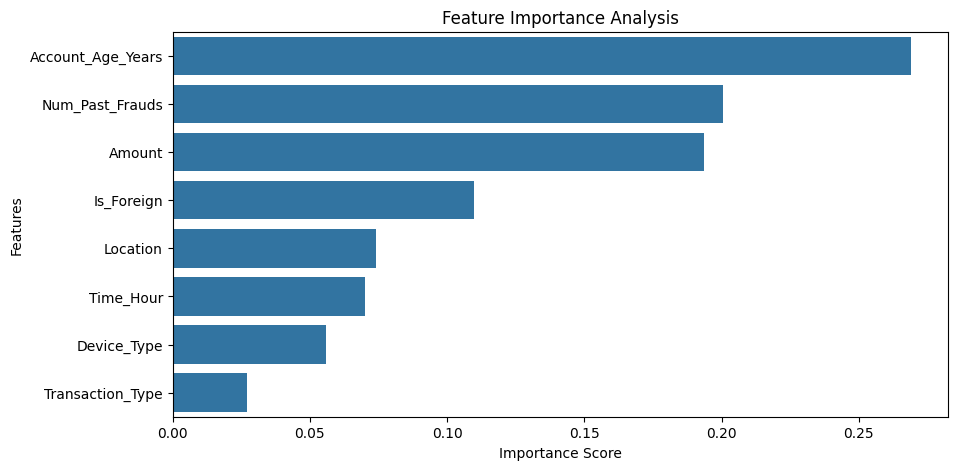

In [10]:
model = RandomForestClassifier(n_estimators=100) 
model.fit(X_train, y_train) 
 
# Get feature importances 
feature_importance = pd.Series(model.feature_importances_, 
index=X.columns).sort_values(ascending=False) 
print("Feature Importance:\n", feature_importance) 
 
plt.figure(figsize=(10, 5)) 
sns.barplot(x=feature_importance, y=feature_importance.index) 
plt.xlabel('Importance Score') 
plt.ylabel('Features') 
plt.title('Feature Importance Analysis') 
plt.show()

### Evaluate the Final Model 

In [11]:
best_model = grid_search.best_estimator_ 
y_pred = best_model.predict(X_test)

print("Final Model Accuracy:", accuracy_score(y_test, y_pred)) 
print("Classification Report:\n", classification_report(y_test, y_pred))

Final Model Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

